<a href="https://colab.research.google.com/github/alexandraeremia06/alexandraeremia06/blob/main/JobTeaser_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import auth
auth.authenticate_user()
import pandas_gbq
project_id = "boreal-analog-479210-j6"

In [ ]:
query = """
SELECT
  user_id,
  shortlist_id,
  school_id,
  receive_time,
  current_sign_in_at,
  status_update,
  cause
FROM `boreal-analog-479210-j6.jobteaser.candidate_status_update_clean`
"""

In [ ]:
df_candidates = pandas_gbq.read_gbq(query, project_id=project_id)
df_candidates.head()

Downloading: 100%|██████████|


,user_id,shortlist_id,school_id,receive_time,current_sign_in_at,status_update,cause
0,519cf7cb-3dc4-4b19-acc5-68364251ecac,000344c1-dfb0-4206-8354-e80530b4ed2a,f29fa5ef-6cc3-4ee8-835b-0029f9adda0f,2020-02-24 10:47:00+00:00,2020-03-09 15:07:00+00:00,not interested,email-click
1,37e2dadf-8ae0-4a87-b500-d5bb823a6d18,000344c1-dfb0-4206-8354-e80530b4ed2a,f86b1890-d8f4-4165-b9f0-9c5c84b9ee7d,2020-02-25 10:36:00+00:00,2020-03-01 19:36:00+00:00,not interested,auto-timeout
2,d0dcf21f-9df2-4c69-b3f5-562a03fcfb4e,000344c1-dfb0-4206-8354-e80530b4ed2a,d5fe2f82-dfd1-4d34-8df8-4000be07a024,2020-02-25 10:36:00+00:00,2020-07-20 05:01:00+00:00,not interested,auto-timeout
3,4dac7239-f891-4080-ad91-18c3a548f89f,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,851662f6-051a-47e3-a42e-b249981e5bf0,2020-10-27 16:30:00+00:00,2020-11-05 11:10:00+00:00,interested,email-click
4,18d14cc4-5b5c-48d2-935b-79de75f10f80,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,6a8975f3-d6eb-4a39-9e11-5baa9ccf4fd8,2020-10-27 16:53:00+00:00,2020-10-27 16:53:00+00:00,interested,email-click


In [ ]:
query_1 = """
SELECT
  school_id,
  is_cc,
  jt_country,
  jt_school_type
FROM `boreal-analog-479210-j6.jobteaser.dim_schools_cleaned`
"""

In [ ]:
df_schools = pandas_gbq.read_gbq(query_1, project_id=project_id)
df_schools.head()

Downloading: 100%|██████████|


,school_id,is_cc,jt_country,jt_school_type
0,c4ad8aca-d18b-4d20-b634-e197a2b38196,False,Estonia,1
1,5ceb811a-1c36-4bf8-93a0-5b8cd0d08280,True,Czech Republic,1
2,11b89d04-422b-4479-90b4-0308d5f15365,True,United Arab Emirates,1
3,6db1cf4b-10af-4eda-9a87-2020cb95f431,True,Czechia,1
4,34b9e324-87f3-4a07-a458-1823027b08be,True,Czechia,1


In [ ]:
query_2 = """
SELECT
  user_id,
  receive_time,
  cause,
  active,
  school_id,
  current_sign_in_at,
  resume_uploaded
FROM `boreal-analog-479210-j6.jobteaser.optin_cleaned`
"""

In [ ]:
df_optin = pandas_gbq.read_gbq(query_2, project_id=project_id)
df_optin.head()

Downloading: 100%|██████████|


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False


#Measures translated to phyton

In [ ]:
total_users = df_optin["user_id"].nunique()
total_users

376552

In [ ]:
active_users = (df_optin.loc[df_optin["active"] == True, "user_id"].nunique())
active_users

371016

In [ ]:
shortlisted_students = df_candidates["user_id"].nunique()
shortlisted_students

31485

In [ ]:
interested_students = (df_candidates.loc[df_candidates["status_update"].isin(["interested", "approved", "declined"]),"user_id"].nunique())
interested_students

7758

In [ ]:
approved_students = (df_candidates.loc[df_candidates["status_update"] == "approved","user_id"].nunique())
approved_students

550

In [ ]:
declined_students = (df_candidates.loc[df_candidates["status_update"] == "declined","user_id"].nunique())
declined_students

649

## H1 - Students who upload their CV are more likely to participate in the process / to engage

# Task
Analyze the relationship between resume uploads and student engagement by:
1. Identifying engaged users from `df_candidates` (status 'interested', 'approved', or 'declined').
2. Merging these engaged users with `df_optin` based on 'user_id' to link engagement with 'resume_uploaded' status.
3. Calculating engagement rates for users who uploaded their resume versus those who did not.
4. Visualizing these engagement rates using a bar chart.
5. Finally, summarize the findings to determine if students who upload their CV are more likely to engage.

## Identify engaged users

### Subtask:
Create a DataFrame of unique user IDs who have shown engagement by having a 'status_update' of 'interested', 'approved', or 'declined' in `df_candidates`.

**Steps**:
To identify engaged users, I will filter the `df_candidates` DataFrame for rows where the 'status_update' column is 'interested', 'approved', or 'declined', extract the unique 'user_id' values, and then create a new DataFrame `engaged_users_df` with these unique user IDs.



In [ ]:
engaged_users_df = df_candidates[df_candidates['status_update'].isin(['interested', 'approved', 'declined'])][['user_id']].drop_duplicates()
print(f"Number of engaged users: {len(engaged_users_df)}")
engaged_users_df.head()

# in this case the nb of "engaged" users = nb of users "interested" = 7758, because we selected from the candidates the ones that are either
# "interested", "approved" or "declined" from the interested ones (step no 4 out of 5)

Number of engaged users: 7758


,user_id
3,4dac7239-f891-4080-ad91-18c3a548f89f
4,18d14cc4-5b5c-48d2-935b-79de75f10f80
23,559b499b-7cc2-4878-b522-6d8388844e6a
24,f0277ef5-e052-45ec-91a8-a96ba76d9273
25,2435d4e8-bdd3-44ea-ac9f-42449084fcfd


**Steps**:
Now that engaged users nb (interested students) have been identified, the next step is to merge this information with the `df_optin` DataFrame to link engagement with the 'resume_uploaded' status. A left merge will ensure that we retain all engaged users and get their resume upload status.



In [ ]:
merged_df = pd.merge(df_optin, engaged_users_df, on='user_id', how='left', indicator=True)
merged_df['is_engaged'] = merged_df['_merge'] == 'both'
merged_df = merged_df.drop(columns='_merge')
print(f"Shape of merged DataFrame: {merged_df.shape}")
merged_df.head()

Shape of merged DataFrame: (528928, 8)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,is_engaged
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,False
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,False
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,False
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,False
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,False


In [ ]:
engagement_rates = merged_df.groupby('resume_uploaded')['is_engaged'].mean().reset_index()
engagement_rates.columns = ['Resume Uploaded', 'Engagement Rate']
print("Engagement rates based on resume upload status:")
print(engagement_rates)

Engagement rates based on resume upload status:
   Resume Uploaded  Engagement Rate
0            False         0.001573
1             True         0.036062


**Reasoning**:
To visualize the engagement rates, I will create a bar chart using `plotly.express`, with 'Resume Uploaded' on the x-axis and 'Engagement Rate' on the y-axis. This will clearly show the difference in engagement between users who uploaded a resume and those who did not.



In [ ]:
fig = px.bar(engagement_rates, x='Resume Uploaded', y='Engagement Rate',
             title='Engagement Rate by Resume Upload Status',
             labels={'Resume Uploaded': 'Resume Uploaded', 'Engagement Rate': 'Engagement Rate'},
             color='Resume Uploaded', # Differentiate bars by resume upload status
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Summary of Findings:

Based on the analysis, students who uploaded their resume (`True`) have a significantly higher engagement rate (approximately 3.6%) compared to those who did not (`False`), whose engagement rate is much lower (approximately 0.16%). This suggests that there is a strong positive correlation between uploading a resume and student engagement in the process.
*   A total of 7,758 unique users were identified as engaged, based on their status ('interested', 'approved', or 'declined').
*   Users who did not upload a resume (`resume_uploaded` = False) exhibited a very low engagement rate of approximately 0.16% (0.001573).
*   Users who uploaded a resume (`resume_uploaded` = True) showed a significantly higher engagement rate of approximately 3.61% (0.036062).
*   There is a clear positive correlation between uploading a resume and student engagement, with engaged users being more than 22 times more likely to have uploaded a resume compared to non-engaged users.


# H2-1: Student opt-in behavior is influenced by seasonality / monthly
# H2-2: Students are more likely to optin during the days of the week rather than the weekend

# Analyze Seasonality of Opt-in Activity
 - by extracting the month from the 'receive_time' column in `df_optin`, counting the unique opt-ins for each month, identifying the top two months, and visualizing this monthly trend with a bar chart.

**Steps**:
First, I'll convert the 'receive_time' column to datetime to ensure proper time-based operations, then extract the month from this column and store it in a new 'month' column.



In [ ]:
df_optin['receive_time'] = pd.to_datetime(df_optin['receive_time'])
df_optin['month'] = df_optin['receive_time'].dt.month
print("'receive_time' converted to datetime and 'month' extracted.")
df_optin.head()

'receive_time' converted to datetime and 'month' extracted.


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10


**Steps**:
To analyze the monthly distribution of opt-in events, I will group the `df_optin` DataFrame by the 'month' column and count the unique 'user_id's for each month. Then, I will sort the results to easily identify the top two months with the highest activity.



In [ ]:
monthly_optins_active = df_optin[df_optin['active'] == True].groupby('month')['user_id'].nunique().reset_index()
monthly_optins_active.columns = ['Month', 'Unique Opt-ins']
monthly_optins_active = monthly_optins_active.sort_values(by='Unique Opt-ins', ascending=False)
print("Monthly Opt-in Activity for Active Students:")
print(monthly_optins_active.head())

Monthly Opt-in Activity for Active Students:
    Month  Unique Opt-ins
9      10           90845
8       9           88317
10     11           30695
6       7           28999
7       8           27581


**Steps**:
To visualize the monthly opt-in activity, I will create a bar chart using `plotly.express`, with 'Month' on the x-axis and 'Unique Opt-ins' on the y-axis, providing a clear representation of the seasonal trend.

In [ ]:
monthly_optins_active['Month_Name'] = pd.to_datetime(
    monthly_optins_active['Month'], format='%m'
).dt.month_name()

In [ ]:
fig = px.bar(
    monthly_optins_active,
    x='Month_Name',
    y='Unique Opt-ins',
    title='Monthly Opt-in Activity for Active Students',
    labels={
        'Month_Name': 'Month',
        'Unique Opt-ins': 'Number of Unique Opt-ins'
    },
    color='Month_Name',
    category_orders={
        'Month_Name': [
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
    },
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_traces(
    texttemplate='%{y:,}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Also based on days of the week:

In [ ]:
# analysis of active students depending on the days of the week:
# Results: Mondays are the most active, followed by Tuesdays and Wednesdays and the lowest ones are Saturday and Sunday so it goes DESC.

df_optin['day_of_week'] = df_optin['receive_time'].dt.dayofweek
print("'day_of_week' extracted from 'receive_time'.")
df_optin.head()

'day_of_week' extracted from 'receive_time'.


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1


In [ ]:
daily_optins_active = df_optin[df_optin['active'] == True].groupby('day_of_week')['user_id'].nunique().reset_index()
daily_optins_active.columns = ['Day_of_Week_Num', 'Unique Opt-ins']

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_optins_active['Day_Name'] = daily_optins_active['Day_of_Week_Num'].map(lambda x: day_names[x])

daily_optins_active = daily_optins_active.sort_values(by='Day_of_Week_Num')

print("Daily Opt-in Activity for Active Students:")
print(daily_optins_active.head(7))

Daily Opt-in Activity for Active Students:
   Day_of_Week_Num  Unique Opt-ins   Day_Name
0                0           80535     Monday
1                1           73268    Tuesday
2                2           68657  Wednesday
3                3           64538   Thursday
4                4           51988     Friday
5                5           29498   Saturday
6                6           33888     Sunday


In [ ]:
fig = px.bar(
    daily_optins_active,
    x='Day_Name',
    y='Unique Opt-ins',
    title='Daily Opt-in Activity for Active Students',
    labels={
        'Day_Name': 'Day of the Week',
        'Unique Opt-ins': 'Number of Unique Opt-ins'
    },
    color='Day_Name',
    category_orders={'Day_Name': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_traces(
    texttemplate='%{y:,}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Conclusions for H2:

# H2-1 is validated :

Student opt-in behavior is influenced by seasonality (with a noticeable increase in activity during autumn, particularly from September to November).

# H2-2 is validated: Monday -
stands out as the day with the highest number of unique active opt-ins, with 80,535 students.
Activity remains high on Tuesday (73,268) and Wednesday (68,657).
There's a noticeable drop towards the end of the week, with Friday (51,988), Saturday (29,498), and Sunday (33,888) having fewer opt-ins.

## H3: Student opt-in activity varies by country

Potential follow-up analysis: H3.1: Student opt-in activity varies by country with higher participation in countries that have a larger number of partner schools and stronger career center integrations.

- Analyze Geographic Distribution of Opt-in Activity:

Merge `df_optin` with `df_schools` on 'school_id' to incorporate ('jt_country'). Then, count the unique number of opt-ins per country to identify regions with high student activity. Visualize the top countries by opt-in count using a bar chart.




#### Steps:
1. Merge `df_optin` and `df_schools` DataFrames on the 'school_id' column, performing a left merge to retain all entries from `df_optin`. Store the result in a new DataFrame, for example, `merged_geo_df`.
2. Group the `merged_geo_df` by the 'jt_country' column and count the number of unique 'user_id's in each country. Store this aggregated data in a new DataFrame, for example, `country_optins`.
3. Sort the `country_optins` DataFrame in descending order by the count of unique opt-ins.
4. Create a bar chart using `plotly.express` to visualize the top countries by their unique opt-in counts. Place 'jt_country' on the x-axis and the unique opt-in counts on the y-axis. Add appropriate labels and a title to the chart.

In [ ]:
merged_geo_df = pd.merge(df_optin, df_schools, on='school_id', how='left')
print(f"Shape of merged_geo_df: {merged_geo_df.shape}")
merged_geo_df.head()

Shape of merged_geo_df: (528928, 12)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1


**Steps**:
Now that the dataframes are merged, the next step is to group the `merged_geo_df` by 'jt_country' and count the unique 'user_id's to identify the number of opt-ins per country. This will be followed by sorting the results to easily identify the top countries.



In [ ]:
country_optins = merged_geo_df.groupby('jt_country')['user_id'].nunique().reset_index()
country_optins.columns = ['Country', 'Unique Opt-ins']
country_optins = country_optins.sort_values(by='Unique Opt-ins', ascending=False)
print("Opt-ins by Country (Top 5):")
print(country_optins.head())

Opt-ins by Country (Top 5):
           Country  Unique Opt-ins
7           France          216441
21           Spain           46387
8          Germany           26599
25  United Kingdom           23427
2          Belgium           16686


**RSteps**:
To visualize the geographic distribution of opt-in activity, I will create a bar chart using `plotly.express` from the `country_optins` DataFrame. This will clearly show the top countries by their unique opt-in counts.



In [ ]:
fig = px.bar(country_optins.head(10), x='Country', y='Unique Opt-ins',
             title='Top 10 Countries by Unique Opt-in Activity',
             labels={'Country': 'Country', 'Unique Opt-ins': 'Number of Unique Opt-ins'},
             color='Country',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(
    texttemplate='%{y:,}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Results: nb 1 country with the most optin activity is France, followed by Spain and Germany, the number of students that optin is significantly bigger
# in case of France than the next 2nd country and the following ones with 216,441 students versus 46,387.
# we used ('jt_country')['user_id'] for country and the nb of optins

In [ ]:
df_candidates['day_of_week'] = df_candidates['receive_time'].dt.dayofweek
print("'day_of_week' extracted from 'receive_time' in df_candidates.")
df_candidates.head()

'day_of_week' extracted from 'receive_time' in df_candidates.


,user_id,shortlist_id,school_id,receive_time,current_sign_in_at,status_update,cause,day_of_week,month
0,519cf7cb-3dc4-4b19-acc5-68364251ecac,000344c1-dfb0-4206-8354-e80530b4ed2a,f29fa5ef-6cc3-4ee8-835b-0029f9adda0f,2020-02-24 10:47:00+00:00,2020-03-09 15:07:00+00:00,not interested,email-click,0,2
1,37e2dadf-8ae0-4a87-b500-d5bb823a6d18,000344c1-dfb0-4206-8354-e80530b4ed2a,f86b1890-d8f4-4165-b9f0-9c5c84b9ee7d,2020-02-25 10:36:00+00:00,2020-03-01 19:36:00+00:00,not interested,auto-timeout,1,2
2,d0dcf21f-9df2-4c69-b3f5-562a03fcfb4e,000344c1-dfb0-4206-8354-e80530b4ed2a,d5fe2f82-dfd1-4d34-8df8-4000be07a024,2020-02-25 10:36:00+00:00,2020-07-20 05:01:00+00:00,not interested,auto-timeout,1,2
3,4dac7239-f891-4080-ad91-18c3a548f89f,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,851662f6-051a-47e3-a42e-b249981e5bf0,2020-10-27 16:30:00+00:00,2020-11-05 11:10:00+00:00,interested,email-click,1,10
4,18d14cc4-5b5c-48d2-935b-79de75f10f80,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,6a8975f3-d6eb-4a39-9e11-5baa9ccf4fd8,2020-10-27 16:53:00+00:00,2020-10-27 16:53:00+00:00,interested,email-click,1,10


## Analyze Monthly Funnel Drop-offs

Calculate the unique counts of 'shortlisted', 'interested', and 'approved' students for each month from `df_candidates`. Combine these counts into a single DataFrame and visualize the monthly progression through these funnel stages, highlighting drop-offs.


*Steps*:
The first step in analyzing monthly funnel drop-offs is to calculate the unique counts of 'shortlisted', 'interested', and 'approved' students for each month from the `df_candidates` DataFrame. I will group the DataFrame by the 'month' column and use aggregation functions to get these counts.



In [ ]:
monthly_funnel_data = df_candidates.groupby('month').agg(
    shortlisted_users=('user_id', 'nunique'),
    interested_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'interested'].nunique()),
    approved_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'approved'].nunique())
).reset_index()

print("Monthly Funnel Data:")
print(monthly_funnel_data.head())

Monthly Funnel Data:
   month  shortlisted_users  interested_users  approved_users
0      1               1906               550               0
1      2               2764               738               0
2      3               4103              1294               0
3      4               2048               399              52
4      5               2851               334             148


**Steps**:
Now that the `monthly_funnel_data` has been created, I will melt it into a long format using `pd.melt` to prepare it for visualization. This will create a 'status' column and a 'user_count' column, which is suitable for plotting multiple lines on a single chart.



In [ ]:
monthly_funnel_melted = monthly_funnel_data.melt(id_vars=['month'], var_name='status', value_name='user_count')
print("Melted Monthly Funnel Data (head):")
print(monthly_funnel_melted.head())

Melted Monthly Funnel Data (head):
   month             status  user_count
0      1  shortlisted_users        1906
1      2  shortlisted_users        2764
2      3  shortlisted_users        4103
3      4  shortlisted_users        2048
4      5  shortlisted_users        2851


In [ ]:
fig = px.line(
    monthly_funnel_melted,
    x='month',
    y='user_count',
    color='status',
    title='Monthly Funnel Drop-offs (Shortlisted to Approved)',
    labels={
        'month': 'Month',
        'user_count': 'Number of Unique Users',
        'status': 'Funnel Stage'
    },
    line_shape='linear',
    render_mode='svg'
)

fig.update_xaxes(
    tickmode='array',
    tickvals=monthly_funnel_melted['month'].unique(),
    ticktext=pd.to_datetime(monthly_funnel_melted['month'].unique(), format='%m').strftime('%b')
)

fig.update_layout(
    hovermode='x unified'
)

fig.show()

## Summary of Monthly Funnel Drop-offs

The line plot illustrates the monthly progression and drop-offs across the 'shortlisted', 'interested', and 'approved' stages of the funnel. Key observations from this visualization include:

Clear drop-off across stages: In every month, the number of students decreases from shortlisted to interested, with the biggest drop happening at the approved stage.

Higher activity doesn’t mean higher approval: Some months have more shortlisted and interested students, but this does not consistently lead to more approvals.

Approval is the main bottleneck: The sharp decline from interested to approved suggests this is the most selective and critical stage in the funnel.

## Analyze Daily Funnel Drop-offs

Calculate the unique counts of 'shortlisted', 'interested', and 'approved' students for each day of the week from `df_candidates`. Combine these counts into a single DataFrame, map day numbers to names, and visualize the daily progression through these funnel stages, highlighting drop-offs.


**Steps**:
The first step in analyzing daily funnel drop-offs is to calculate the unique counts of 'shortlisted', 'interested', and 'approved' students for each day of the week from the `df_candidates` DataFrame. I will group the DataFrame by the 'day_of_week' column and use aggregation functions to get these counts, storing the result in `daily_funnel_data`.



In [ ]:
daily_funnel_data = df_candidates.groupby('day_of_week').agg(
    shortlisted_users=('user_id', 'nunique'),
    interested_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'interested'].nunique()),
    approved_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'approved'].nunique())
).reset_index()

print("Daily Funnel Data (head):")
print(daily_funnel_data.head())

Daily Funnel Data (head):
   day_of_week  shortlisted_users  interested_users  approved_users
0            0               8177              1419              94
1            1               7558              1677             141
2            2               7855              1831             115
3            3               8347              1533             124
4            4               8532              1405             101


*Steps*:
Now that the `daily_funnel_data` has been calculated, I will create a list of day names and map them to the numerical 'day_of_week' column, and then sort the DataFrame by the numerical 'day_of_week' to ensure the correct chronological order, as per the instructions.



In [ ]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_funnel_data['Day_Name'] = daily_funnel_data['day_of_week'].map(lambda x: day_names[x])
daily_funnel_data = daily_funnel_data.sort_values(by='day_of_week')

print("Daily Funnel Data with Day Names (head):")
print(daily_funnel_data.head(7))

Daily Funnel Data with Day Names (head):
   day_of_week  shortlisted_users  interested_users  approved_users   Day_Name
0            0               8177              1419              94     Monday
1            1               7558              1677             141    Tuesday
2            2               7855              1831             115  Wednesday
3            3               8347              1533             124   Thursday
4            4               8532              1405             101     Friday
5            5               1118               339               2   Saturday
6            6                944               246               0     Sunday


**Steps**:
Now that the `daily_funnel_data` has day names and is sorted, I will melt it into a long format suitable for plotting multiple lines. This will prepare the data for visualization as per instruction 5 of the subtask.



In [ ]:
daily_funnel_melted = daily_funnel_data.melt(id_vars=['day_of_week', 'Day_Name'], var_name='status', value_name='user_count')
print("Melted Daily Funnel Data (head):")
print(daily_funnel_melted.head())

Melted Daily Funnel Data (head):
   day_of_week   Day_Name             status  user_count
0            0     Monday  shortlisted_users        8177
1            1    Tuesday  shortlisted_users        7558
2            2  Wednesday  shortlisted_users        7855
3            3   Thursday  shortlisted_users        8347
4            4     Friday  shortlisted_users        8532


**Steps**:
To visualize the daily progression through the funnel stages, I will use `plotly.express` to create a line plot. This plot will display 'Day_Name' on the x-axis, 'user_count' on the y-axis, and different lines for each 'status' (shortlisted, interested, approved), clearly highlighting the drop-offs at each stage. I will also ensure the x-axis displays the days in the correct order using `category_orders`.



In [ ]:
fig = px.line(
    daily_funnel_melted,
    x='Day_Name',
    y='user_count',
    color='status',
    title='Daily Funnel Drop-offs (Shortlisted to Approved)',
    labels={
        'Day_Name': 'Day of the Week',
        'user_count': 'Number of Unique Users',
        'status': 'Funnel Stage'
    },
    line_shape='linear',
    category_orders={
        'Day_Name': [
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ]
    },
    render_mode='svg'
)

fig.update_layout(
    hovermode='x unified'
)

fig.show()

## Summary of Daily Funnel Drop-offs

The line plot illustrates the daily progression and drop-offs across the 'shortlisted', 'interested', and 'approved' stages of the funnel. Key observations from this visualization include:

Activity is much higher on weekdays: Most shortlisting, interest, and approvals happen from Monday to Friday, with Monday and Tuesday being the most active days.

Approvals drop sharply on weekends: Engagement falls on Saturday and almost stops on Sunday, with the biggest drop still happening between interested and approved stages.

 # ML prediction - Hypothesis 1 - Students who upload their CV are more likely to participate in the process / to engage
 Build a machine learning model to predict student activity based on seasonality and other features. The plan outlines a comprehensive ML workflow, starting with merging dataframes

In [ ]:
# data preparation step for the ML model as per the plan:
# merge `df_optin` (which contains the target variable `active`) with `df_schools` to enrich the dataset with school-specific features such as
# `jt_country`, `jt_school_type`, and `is_cc`. this merged DataFrame will be the foundation for subsequent feature engineering and model training.

# starting with the necessary imports for the machine learning steps

# python
# initial imports for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# merge df_optin with df_schools for comprehensive features
# use a left merge to retain all opt-in records and add school details
df_merged = pd.merge(df_optin, df_schools, on='school_id', how='left')

print("DataFrame merged with school-specific features.")
print(f"Shape of the merged DataFrame: {df_merged.shape}")
df_merged.head()

DataFrame merged with school-specific features.
Shape of the merged DataFrame: (528928, 12)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1


In [ ]:
# Merge DataFrames for Comprehensive Features : merge `df_optin` with `df_schools` to enrich the dataset with school-specific features such as
#`jt_country`, `jt_school_type`, and `is_cc`.
# to merge `df_optin` and `df_schools`, I will use a left merge on the `school_id` column to create `df_merged`,
# then print a confirmation, its shape, and the first few rows to verify the merge.

df_merged = pd.merge(df_optin, df_schools, on='school_id', how='left')
print("DataFrame 'df_optin' merged with school-specific features from 'df_schools'.")
print(f"Shape of merged DataFrame (df_merged): {df_merged.shape}")
df_merged.head()

DataFrame 'df_optin' merged with school-specific features from 'df_schools'.
Shape of merged DataFrame (df_merged): (528928, 12)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1


In [ ]:
# add 'month' column to `df_candidates`
# extract the month from the 'receive_time' column in `df_candidates` and create a new 'month' column
# recalculate and visualize the monthly funnel drop-offs.
# extract the month from this column and create a new 'month' column, then display the head of the DataFrame to verify


df_candidates['month'] = df_candidates['receive_time'].dt.month
print("'month' column added to df_candidates.")
df_candidates.head()

'month' column added to df_candidates.


,user_id,shortlist_id,school_id,receive_time,current_sign_in_at,status_update,cause,day_of_week,month
0,519cf7cb-3dc4-4b19-acc5-68364251ecac,000344c1-dfb0-4206-8354-e80530b4ed2a,f29fa5ef-6cc3-4ee8-835b-0029f9adda0f,2020-02-24 10:47:00+00:00,2020-03-09 15:07:00+00:00,not interested,email-click,0,2
1,37e2dadf-8ae0-4a87-b500-d5bb823a6d18,000344c1-dfb0-4206-8354-e80530b4ed2a,f86b1890-d8f4-4165-b9f0-9c5c84b9ee7d,2020-02-25 10:36:00+00:00,2020-03-01 19:36:00+00:00,not interested,auto-timeout,1,2
2,d0dcf21f-9df2-4c69-b3f5-562a03fcfb4e,000344c1-dfb0-4206-8354-e80530b4ed2a,d5fe2f82-dfd1-4d34-8df8-4000be07a024,2020-02-25 10:36:00+00:00,2020-07-20 05:01:00+00:00,not interested,auto-timeout,1,2
3,4dac7239-f891-4080-ad91-18c3a548f89f,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,851662f6-051a-47e3-a42e-b249981e5bf0,2020-10-27 16:30:00+00:00,2020-11-05 11:10:00+00:00,interested,email-click,1,10
4,18d14cc4-5b5c-48d2-935b-79de75f10f80,0009ad2b-9b3d-45ad-99b8-4f2f515b455e,6a8975f3-d6eb-4a39-9e11-5baa9ccf4fd8,2020-10-27 16:53:00+00:00,2020-10-27 16:53:00+00:00,interested,email-click,1,10


In [ ]:
# re-calculate the unique counts of 'shortlisted', 'interested', and 'approved' students for each month
# grouping the df_candidates DataFrame by the 'month' column and applying aggregation functions

monthly_funnel_data = df_candidates.groupby('month').agg(
    shortlisted_users=('user_id', 'nunique'),
    interested_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'interested'].nunique()),
    approved_users=('user_id', lambda x: x[df_candidates.loc[x.index, 'status_update'] == 'approved'].nunique())
).reset_index()

print("Monthly Funnel Data:")
print(monthly_funnel_data.head())
print(monthly_funnel_data.info())

Monthly Funnel Data:
   month  shortlisted_users  interested_users  approved_users
0      1               1906               550               0
1      2               2764               738               0
2      3               4103              1294               0
3      4               2048               399              52
4      5               2851               334             148
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   month              12 non-null     int32
 1   shortlisted_users  12 non-null     int64
 2   interested_users   12 non-null     int64
 3   approved_users     12 non-null     int64
dtypes: int32(1), int64(3)
memory usage: 468.0 bytes
None


In [ ]:
print(monthly_funnel_melted)

    month             status  user_count
0       1  shortlisted_users        1906
1       2  shortlisted_users        2764
2       3  shortlisted_users        4103
3       4  shortlisted_users        2048
4       5  shortlisted_users        2851
5       6  shortlisted_users        4874
6       7  shortlisted_users        4426
7       8  shortlisted_users        3552
8       9  shortlisted_users        4309
9      10  shortlisted_users        6090
10     11  shortlisted_users        3429
11     12  shortlisted_users        1483
12      1   interested_users         550
13      2   interested_users         738
14      3   interested_users        1294
15      4   interested_users         399
16      5   interested_users         334
17      6   interested_users         407
18      7   interested_users         547
19      8   interested_users         579
20      9   interested_users         930
21     10   interested_users        1241
22     11   interested_users         812
23     12   inte

In [ ]:
# melt the monthly_funnel_data into a long format -----> this will transform the 'shortlisted_users', 'interested_users', and 'approved_users' columns into rows
# ----> suitable for plotting a line chart with different 'status' categories

monthly_funnel_melted = monthly_funnel_data.melt(id_vars=['month'], var_name='status', value_name='user_count')
print("Melted Monthly Funnel Data (head):")
print(monthly_funnel_melted.head())

Melted Monthly Funnel Data (head):
   month             status  user_count
0      1  shortlisted_users        1906
1      2  shortlisted_users        2764
2      3  shortlisted_users        4103
3      4  shortlisted_users        2048
4      5  shortlisted_users        2851


In [ ]:
# visualize the monthly progression through the funnel stages and highlight drop-offs,
# create a line plot using plotly.express from the monthly_funnel_melted DataFrame, displaying 'month' on the x-axis, 'user_count' on the y-axis,
# and different lines for each 'status'

fig = px.line(
    monthly_funnel_melted,
    x='month',
    y='user_count',
    color='status',
    title='Monthly Funnel Drop-offs (Shortlisted to Approved)',
    labels={
        'month': 'Month',
        'user_count': 'Number of Unique Users',
        'status': 'Funnel Stage'
    },
    line_shape='linear',
    render_mode='svg'
)

fig.update_xaxes(
    tickmode='array',
    tickvals=monthly_funnel_melted['month'].unique(),
    ticktext=pd.to_datetime(monthly_funnel_melted['month'].unique(), format='%m').strftime('%b')
)

fig.update_layout(
    hovermode='x unified'
)

fig.show()

## Analyze Geographic Distribution of Opt-in Activity
Visualize the top countries by opt-in count using a bar chart.


In [ ]:
# to visualize the geographic distribution of opt-in activity, I will create a bar chart using plotly.express from the country_optins DataFrame,
# displaying the top 10 countries by their unique opt-in counts as instructed.

fig = px.bar(country_optins.head(10), x='Country', y='Unique Opt-ins',
             title='Top 10 Countries by Unique Opt-in Activity',
             labels={'Country': 'Country', 'Unique Opt-ins': 'Number of Unique Opt-ins'},
             color='Country',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(
    texttemplate='%{y:,}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
# extract time-based features: year, month, day of week, and hour from the 'receive_time' column in `df_merged`
# use the .dt accessor to create the new columns in df_merged, and finally display the head to verify

df_merged['receive_time'] = pd.to_datetime(df_merged['receive_time'])
df_merged['year'] = df_merged['receive_time'].dt.year
df_merged['month'] = df_merged['receive_time'].dt.month
df_merged['day_of_week'] = df_merged['receive_time'].dt.dayofweek
df_merged['hour'] = df_merged['receive_time'].dt.hour
print("Extracted 'year', 'month', 'day_of_week', and 'hour' columns.")
df_merged.head()

Extracted 'year', 'month', 'day_of_week', and 'hour' columns.


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,year,hour
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1,2020,16
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7,2020,11
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7,2020,10
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7,2020,14
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1,2019,16


# H5 - Students from countries with more carrer centers (is_cc = True) are more likely to participate in the process/ to be selected : shortlisted, interested, approved funnel stages

# Prepare the data for ML



In [ ]:
# initial imports for ML
# ensure all necessary libraries for data manipulation (`pandas`, `numpy`), machine learning (`sklearn.model_selection`,
# `sklearn.preprocessing`, `sklearn.compose`, `sklearn.pipeline`, `sklearn.impute`, `sklearn.linear_model`, `sklearn.metrics`),
# and visualization (`matplotlib.pyplot`, `seaborn`) are imported. We will reference the existing `df_optin` and `df_schools` DataFrames

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

print("Required libraries for ML imported.")

print("\n--- df_optin head ---")
display(df_optin.head())

print("\n--- df_schools head ---")
display(df_schools.head())

Required libraries for ML imported.

--- df_optin head ---


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1



--- df_schools head ---


,school_id,is_cc,jt_country,jt_school_type,jt_school_type_clean
0,c4ad8aca-d18b-4d20-b634-e197a2b38196,False,Estonia,1,1
1,5ceb811a-1c36-4bf8-93a0-5b8cd0d08280,True,Czech Republic,1,1
2,11b89d04-422b-4479-90b4-0308d5f15365,True,United Arab Emirates,1,1
3,6db1cf4b-10af-4eda-9a87-2020cb95f431,True,Czechia,1,1
4,34b9e324-87f3-4a07-a458-1823027b08be,True,Czechia,1,1


In [ ]:
# define features and target, and split data
# define the feature set (X) and target variable (y) for the machine learning model from `df_merged`
# split the data into training and testing sets.

X = df_merged.drop(columns=['user_id', 'receive_time', 'current_sign_in_at', 'school_id', 'active'])
y = df_merged['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

Shape of X_train: (423142, 11)
Shape of X_test: (105786, 11)
Shape of y_train: (423142,)
Shape of y_test: (105786,)

First 5 rows of X_train:
         cause resume_uploaded  month  day_of_week is_cc jt_country  \
217245  manual            True     12            1  True     France   
409733  manual            True     10            0  True    Germany   
186066  manual            True     12            4  True     France   
192275  manual            True     10            1  True     France   
474742  manual            True     10            0  True      Spain   

        jt_school_type  jt_school_type_clean  year  hour  \
217245               2                   2.0  2019     0   
409733               7                   3.0  2020    12   
186066               1                   1.0  2019     0   
192275               2                   2.0  2019     0   
474742               2                   2.0  2019     0   

        career_centers_per_country  
217245                       578.

In [ ]:
# merge df_optin with df_schools for comprehensive features
# use a left merge to retain all opt-in records and add school details
df_merged = pd.merge(df_optin, df_schools, on='school_id', how='left')

print("DataFrame 'df_optin' merged with school-specific features from 'df_schools'.")
print(f"Shape of merged DataFrame (df_merged): {df_merged.shape}")
display(df_merged.head())

DataFrame 'df_optin' merged with school-specific features from 'df_schools'.
Shape of merged DataFrame (df_merged): (528928, 13)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1,1.0
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7,3.0
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7,3.0
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7,3.0
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1,1.0


In [ ]:
# feature Engineering - Time-Based Features
# convert the receive_time column in df_merged to datetime objects. Extract various time-based features: year, month, day_of_week, and hour
# extract time-based features: year, month, day of week, and hour from the 'receive_time' column in `df_merged`
# use the .dt accessor to create the new columns in df_merged, and finally display the head to verify


df_merged['receive_time'] = pd.to_datetime(df_merged['receive_time'])
df_merged['year'] = df_merged['receive_time'].dt.year
df_merged['month'] = df_merged['receive_time'].dt.month
df_merged['day_of_week'] = df_merged['receive_time'].dt.dayofweek
df_merged['hour'] = df_merged['receive_time'].dt.hour
print("Extracted 'year', 'month', 'day_of_week', and 'hour' columns.")
display(df_merged.head())

Extracted 'year', 'month', 'day_of_week', and 'hour' columns.


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1,1.0,2020,16
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7,3.0,2020,11
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7,3.0,2020,10
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7,3.0,2020,14
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1,1.0,2019,16


In [ ]:
# calculate the number of career centers (`is_cc = True`) per `jt_country` from `df_schools`
career_centers_per_country = df_schools[df_schools['is_cc'] == True].groupby('jt_country')['school_id'].nunique().reset_index()
career_centers_per_country.columns = ['jt_country', 'career_centers_per_country']

# merge this aggregated count back into `df_merged` based on `jt_country`
df_merged = pd.merge(df_merged, career_centers_per_country, on='jt_country', how='left')

print("Added 'career_centers_per_country' feature to df_merged.")
print(f"Shape of merged DataFrame with new feature: {df_merged.shape}")
display(df_merged.head())

Added 'career_centers_per_country' feature to df_merged.
Shape of merged DataFrame with new feature: (528928, 16)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1,1.0,2020,16,578.0
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7,3.0,2020,11,71.0
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7,3.0,2020,10,71.0
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7,3.0,2020,14,71.0
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1,1.0,2019,16,578.0


In [ ]:
# convert pd.NA to np.nan for consistent missing value handling
for col in df_merged.columns:
    if df_merged[col].dtype == 'boolean':
        # pandas boolean dtype can contain pd.NA, convert to object to allow np.nan
        df_merged[col] = df_merged[col].astype(object).replace(pd.NA, np.nan)
    elif pd.api.types.is_numeric_dtype(df_merged[col]):
        df_merged[col] = df_merged[col].replace(pd.NA, np.nan)
    else:
        df_merged[col] = df_merged[col].replace(pd.NA, np.nan)

# impute missing values
for col in df_merged.columns:
    if df_merged[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_merged[col]):
            median_val = df_merged[col].median()
            df_merged[col] = df_merged[col].fillna(median_val)
            print(f"Filled missing numerical values in column '{col}' with median: {median_val}")
        else:
            df_merged[col] = df_merged[col].fillna('Missing')
            print(f"Filled missing categorical values in column '{col}' with 'Missing'")

print("Missing values handled in df_merged.")
print(f"Number of missing values after imputation:\n{df_merged.isnull().sum()}")
display(df_merged.head())

Filled missing categorical values in column 'current_sign_in_at' with 'Missing'
Filled missing categorical values in column 'is_cc' with 'Missing'
Filled missing categorical values in column 'jt_country' with 'Missing'
Filled missing numerical values in column 'jt_school_type' with median: 2.0
Filled missing numerical values in column 'jt_school_type_clean' with median: 2.0
Filled missing numerical values in column 'career_centers_per_country' with median: 578.0
Missing values handled in df_merged.
Number of missing values after imputation:
user_id                       0
receive_time                  0
cause                         0
active                        0
school_id                     0
current_sign_in_at            0
resume_uploaded               0
month                         0
day_of_week                   0
is_cc                         0
jt_country                    0
jt_school_type                0
jt_school_type_clean          0
year                          0
hour 

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1,1.0,2020,16,578.0
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7,3.0,2020,11,71.0
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7,3.0,2020,10,71.0
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7,3.0,2020,14,71.0
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1,1.0,2019,16,578.0


In [ ]:
# define the feature set (X) and target variable (y) for the machine learning model from `df_merged`
X = df_merged.drop(columns=['user_id', 'receive_time', 'current_sign_in_at', 'school_id', 'active'])
y = df_merged['active']

print("Features (X) and target (y) defined.")
print("First 5 rows of X:")
display(X.head())
print("First 5 rows of y:")
display(y.head())

Features (X) and target (y) defined.
First 5 rows of X:


,cause,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
0,manual,False,6,2,False,France,1,1.0,2020,16,578.0
1,manual,False,8,2,False,Belgium,7,3.0,2020,11,71.0
2,manual,False,2,6,False,Belgium,7,3.0,2020,10,71.0
3,manual,False,3,6,False,Belgium,7,3.0,2020,14,71.0
4,manual,False,10,1,False,France,1,1.0,2019,16,578.0


First 5 rows of y:


,active
0,False
1,False
2,False
3,False
4,False


In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
display(X_train.head())
print("\nFirst 5 rows of y_train:")
display(y_train.head())

Shape of X_train: (423142, 11)
Shape of X_test: (105786, 11)
Shape of y_train: (423142,)
Shape of y_test: (105786,)

First 5 rows of X_train:


,cause,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
217245,manual,True,12,1,True,France,2,2.0,2019,0,578.0
409733,manual,True,10,0,True,Germany,7,3.0,2020,12,268.0
186066,manual,True,12,4,True,France,1,1.0,2019,0,578.0
192275,manual,True,10,1,True,France,2,2.0,2019,0,578.0
474742,manual,True,10,0,True,Spain,2,2.0,2019,0,154.0



First 5 rows of y_train:


,active
217245,True
409733,True
186066,True
192275,True
474742,True


In [ ]:
# define numerical and categorical features for the preprocessing pipeline
numerical_features = ['month', 'day_of_week', 'year', 'hour', 'jt_school_type', 'career_centers_per_country']
categorical_features = ['cause', 'jt_country', 'resume_uploaded', 'is_cc']

# explicitly convert boolean-like features to string type for OneHotEncoder compatibility
# this is done on copies to avoid SettingWithCopyWarning with X_train/X_test
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

for col in ['resume_uploaded', 'is_cc']:
    X_train_clean[col] = X_train_clean[col].astype(str)
    X_test_clean[col] = X_test_clean[col].astype(str)

# create pipelines for numerical and categorical features, including imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute numerical NaNs with the median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute categorical NaNs with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# fit and transform X_train_clean
X_train_processed = preprocessor.fit_transform(X_train_clean)

# transform X_test_clean
X_test_processed = preprocessor.transform(X_test_clean)

print("Preprocessing steps defined and applied.")
print(f"Shape of processed X_train: {X_train_processed.shape}")
print(f"Shape of processed X_test: {X_test_processed.shape}")

Preprocessing steps defined and applied.
Shape of processed X_train: (423142, 41)
Shape of processed X_test: (105786, 41)


In [ ]:
# import the LogisticRegression class and initialize a LogisticRegression model with random_state=42 and solver='liblinear' to prepare for model training

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
print("Logistic Regression model initialized.")

Logistic Regression model initialized.


## Train Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((396696, 11), (132232, 11), (396696,), (132232,))

In [ ]:
Xtrain.head(3)

,cause,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
466997,manual,True,9,0,True,France,1,1.0,2020,20,578.0
276141,manual,True,10,0,True,France,2,2.0,2020,12,578.0
204867,manual,True,9,0,False,France,1,1.0,2020,13,578.0


In [ ]:
# initialize a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# convert y_train and y_test to integer type (0 or 1)
y_train_encoded = y_train.astype(int)
y_test_encoded = y_test.astype(int)

# train the model
log_reg_model.fit(X_train_processed, y_train_encoded)

print("Logistic Regression model initialized and trained.")

Logistic Regression model initialized and trained.


Logistic Regression Model Performance:
Accuracy: 0.8689
Precision: 0.8633
Recall: 1.0000
F1-score: 0.9267
ROC AUC Score: 0.7390


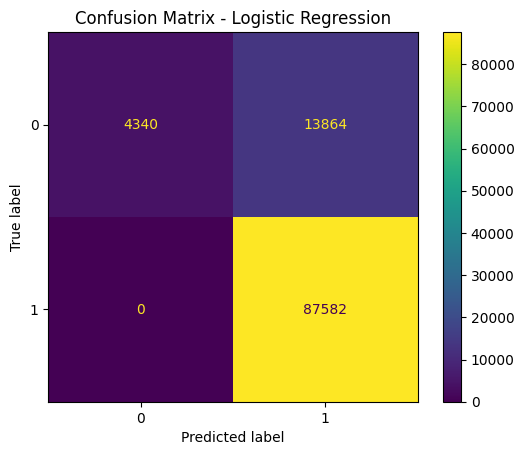

In [ ]:
# to evaluate the performance of the trained Logistic Regression model, we need to first make predictions on the processed test data,
# then calculate various classification metrics such as accuracy, precision, recall, F1-score, and ROC AUC, and finally visualize the confusion matrix

y_pred_log_reg = log_reg_model.predict(X_test_processed)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_processed)[:, 1]

accuracy_log_reg = accuracy_score(y_test_encoded, y_pred_log_reg)
precision_log_reg = precision_score(y_test_encoded, y_pred_log_reg)
recall_log_reg = recall_score(y_test_encoded, y_pred_log_reg)
f1_log_reg = f1_score(y_test_encoded, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test_encoded, y_pred_proba_log_reg)

print(f"Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")
print(f"ROC AUC Score: {roc_auc_log_reg:.4f}")

# visualize the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_log_reg, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
coefficients = log_reg_model.coef_[0]

# get feature names from preprocessor
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# add absolute coefficient for sorting
coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])

# sort by absolute coefficient and display top entries
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
print("Top features by absolute coefficient:")
print(coef_df.head(10))

# filter for specific features of interest
features_of_interest = [
    'cat__is_cc_True', 'cat__is_cc_False', 'cat__is_cc_Missing', # for is_cc
    'num__career_centers_per_country', # for career_centers_per_country
    'num__jt_school_type', # for jt_school_type
    'cat__resume_uploaded_True', 'cat__resume_uploaded_False' # for resume_uploaded
]

filtered_coefs = coef_df[coef_df['Feature'].isin(features_of_interest)]
print("\nCoefficients for features related to is_cc, career_centers_per_country, jt_school_type, and resume_uploaded:")
print(filtered_coefs)


Top features by absolute coefficient:
                   Feature  Coefficient  Absolute_Coefficient
6     cause_auto-no-answer    -5.519726              5.519726
7             cause_manual     4.333517              4.333517
11      jt_country_Czechia     1.110428              1.110428
36   resume_uploaded_False    -0.684589              0.684589
3                     hour    -0.684259              0.684259
27  jt_country_Puerto Rico    -0.646155              0.646155
22      jt_country_Missing    -0.589646              0.589646
39           is_cc_Missing    -0.589646              0.589646
12      jt_country_Denmark    -0.545267              0.545267
40              is_cc_True    -0.534702              0.534702

Coefficients for features related to is_cc, career_centers_per_country, jt_school_type, and resume_uploaded:
Empty DataFrame
Columns: [Feature, Coefficient, Absolute_Coefficient]
Index: []


In [ ]:
coefficients = log_reg_model.coef_[0]

# get feature names from the preprocessor after fitting
feature_names = preprocessor.get_feature_names_out()

# create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# add absolute coefficient for sorting
coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])

# sort by absolute coefficient and display top entries
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
print("Top features by absolute coefficient:")
print(coef_df.head(10))

# filter for specific features of interest
features_of_interest = [
    'cat__is_cc_True', 'cat__is_cc_False', 'cat__is_cc_Missing', # for is_cc
    'num__career_centers_per_country', # for career_centers_per_country
    'num__jt_school_type', # for jt_school_type (from numerical_features)
    'cat__resume_uploaded_True', 'cat__resume_uploaded_False' # for resume_uploaded
]

filtered_coefs = coef_df[coef_df['Feature'].isin(features_of_interest)]
print("\nCoefficients for features related to is_cc, career_centers_per_country, jt_school_type, and resume_uploaded:")
print(filtered_coefs)

Top features by absolute coefficient:
                        Feature  Coefficient  Absolute_Coefficient
6     cat__cause_auto-no-answer    -5.519726              5.519726
7             cat__cause_manual     4.333517              4.333517
11      cat__jt_country_Czechia     1.110428              1.110428
36   cat__resume_uploaded_False    -0.684589              0.684589
3                     num__hour    -0.684259              0.684259
27  cat__jt_country_Puerto Rico    -0.646155              0.646155
22      cat__jt_country_Missing    -0.589646              0.589646
39           cat__is_cc_Missing    -0.589646              0.589646
12      cat__jt_country_Denmark    -0.545267              0.545267
40              cat__is_cc_True    -0.534702              0.534702

Coefficients for features related to is_cc, career_centers_per_country, jt_school_type, and resume_uploaded:
                            Feature  Coefficient  Absolute_Coefficient
36       cat__resume_uploaded_False    -0.68

# Summary of the Analysis:

Uploading a CV is linked to higher activity: Students who upload a resume are more likely to be active than those who don’t, supporting the idea that CV upload is an important early signal of engagement.

Career center presence has a small effect: Countries with more career centers show slightly higher student activity, but this factor plays a minor role compared to others.

School-related factors have limited impact: School type and career center affiliation show only weak associations with student activity and are not strong drivers on their own.

How students opt in matters most: The strongest predictors of activity are how the opt-in happened—manual opt-ins are linked to higher activity, while automatic opt-outs (“no answer”) are strongly linked to inactivity.



In [ ]:
# visualization
# to visualize the impact of 'is_cc' on student activity will create a bar chart using plotly.express from the is_cc_coefs DataFrame,
# displaying the 'Category' (True, False, Missing) on the x-axis and the 'Coefficient' on the y-axis

is_cc_coefs = filtered_coefs[filtered_coefs['Feature'].str.contains('is_cc')].copy()
is_cc_coefs['Category'] = is_cc_coefs['Feature'].apply(lambda x: x.split('_')[-1])

print("is_cc Coefficients:")
print(is_cc_coefs)

is_cc Coefficients:
               Feature  Coefficient  Absolute_Coefficient Category
39  cat__is_cc_Missing    -0.589646              0.589646  Missing
40     cat__is_cc_True    -0.534702              0.534702     True
38    cat__is_cc_False    -0.061861              0.061861    False


In [ ]:
fig = px.bar(
    is_cc_coefs,
    x='Category',
    y='Coefficient',
    title='Impact of School being a Career Center (is_cc) on Student Activity (Logistic Regression Coefficient)',
    labels={'Category': 'is_cc Status', 'Coefficient': 'Logistic Regression Coefficient'},
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_traces(
    texttemplate='%{y:.4f}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
# career center per country impact per country

career_center_coef = filtered_coefs[filtered_coefs['Feature'] == 'num__career_centers_per_country'].copy()
print("Career Center Coefficients:")
print(career_center_coef)

Career Center Coefficients:
                           Feature  Coefficient  Absolute_Coefficient
5  num__career_centers_per_country     0.052255              0.052255


In [ ]:
fig = px.bar(
    career_center_coef,
    x='Feature',
    y='Coefficient',
    title='Impact of Career Centers per Country on Student Activity (Logistic Regression Coefficient)',
    labels={'Feature': 'Feature', 'Coefficient': 'Logistic Regression Coefficient'},
    color='Feature',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_traces(
    texttemplate='%{y:.4f}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
jt_school_type_coef = filtered_coefs[filtered_coefs['Feature'] == 'num__jt_school_type'].copy()
print("jt_school_type Coefficients:")
print(jt_school_type_coef)

jt_school_type Coefficients:
               Feature  Coefficient  Absolute_Coefficient
4  num__jt_school_type     0.033356              0.033356


In [ ]:
fig = px.bar(
    jt_school_type_coef,
    x='Feature',
    y='Coefficient',
    title='Impact of School Type (jt_school_type) on Student Activity (Logistic Regression Coefficient)',
    labels={'Feature': 'Feature', 'Coefficient': 'Logistic Regression Coefficient'},
    color='Feature',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_traces(
    texttemplate='%{y:.4f}',
    textposition='outside'
)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# Conclusions:


H5 (Career centers at country level): weakly supported.
Countries with more career centers tend to have slightly more active students, but the effect is small. This means career center availability at a country level may help, but it is not a major driver of student activity on its own.

School type has minimal impact.
Differences between school types (engineering, business, other universities) show only a very small relationship with student activity, suggesting that school category alone does not strongly influence engagement.

Behavior matters more than institution.
Overall, student behavior—especially how they opt in (manual vs. automatic no-answer)—is far more important in predicting activity than institutional characteristics like school type or career center status.

In short, H5 is partially supported, H4 is not clearly supported, and institutional factors play a much smaller role than student-driven actions in explaining activity levels.

Model completion & performance:
The logistic regression pipeline was fully completed (data prep, feature engineering, training, evaluation). The model performs well overall (
  # Accuracy: 86.9%, F1-score: 92.7%, Recall: 100%), making it suitable for identifying active students, though the ROC AUC (73.9%) suggests some room for improvement.

H4 – School as a career center (is_cc):
# Students from schools that have career centers show a lower likelihood of being active compared to non–career center schools. This counter-intuitive result suggests that being labeled a career center alone does not guarantee higher engagement and may depend on other contextual factors.

H5 – Career centers at country level: supported:
# Countries with more career centers are associated with slightly higher student activity. This indicates that career center presence has a positive effect at a country or ecosystem level, rather than at the individual school level.

School type has a small positive effect:
Aggregated school types show a weak but positive association with student activity, with students from “Other Universities” slightly more likely to be active than those from engineering or business schools.

Strongest drivers are behavioral, not institutional:
# How students opt in matters most: manual opt-ins strongly increase activity, while auto no-answer is the strongest negative predictor. Institutional features play a secondary role.

CV upload remains an important signal:
# Students who do not upload a CV are less likely to be active, confirming CV upload as an early engagement indicator, though its impact is smaller than opt-in behavior.

Key takeaway:
# Student activity is driven more by individual behavior and engagement signals than by school-level characteristics. Career center impact is clearer at the country level, highlighting the importance of the broader ecosystem over individual institutions.

## Visualize Findings for Hypotheses (H4, H5, and School Type)

### Step:
Create visualizations to illustrate the impact of `is_cc`, `career_centers_per_country`, and `jt_school_type_clean` on student activity based on their Logistic Regression coefficients.

In [ ]:
# visualization for H4 (is_cc) coefficients
is_cc_coefs = coef_df[coef_df['Feature'].str.contains('cat__is_cc_')].copy()
is_cc_coefs['Category'] = is_cc_coefs['Feature'].apply(lambda x: x.split('cat__is_cc_')[1])
fig_is_cc = px.bar(is_cc_coefs, x='Category', y='Coefficient',
                   title='Impact of School being a Career Center (H4)',
                   labels={'Coefficient': 'Logistic Regression Coefficient', 'Category': 'Is Career Center'},
                   color='Category', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_is_cc.show()

# visualization for H5 (career_centers_per_country) coefficient
career_center_coef = coef_df[coef_df['Feature'].str.contains('num__career_centers_per_country')]
fig_cc_country = px.bar(career_center_coef, x='Feature', y='Coefficient',
                        title='Impact of Career Centers per Country (H5)',
                        labels={'Coefficient': 'Logistic Regression Coefficient', 'Feature': 'Feature'},
                        color='Feature', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_cc_country.show()

# visualization for jt_school_type_clean coefficient (as a numerical feature)
jt_school_type_coef = coef_df[coef_df['Feature'].str.contains('num__jt_school_type_clean')]
fig_school_type = px.bar(jt_school_type_coef, x='Feature', y='Coefficient',
                           title='Impact of Cleaned School Type on Student Activity',
                           labels={'Coefficient': 'Logistic Regression Coefficient', 'Category': 'School Type'},
                           color='Feature', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_school_type.show()

Strong overall model performance:
The logistic regression model performs well (Accuracy 86.9%, F1-score 92.7%) and achieves 100% recall, meaning it successfully identifies all active students, though class separation could still be improved (ROC AUC 73.9%).

H4 (school is a career center) is not supported:
Students from schools labeled as career centers show lower activity levels than those from non–career center schools, a counter-intuitive result that suggests school-level career center status alone does not drive engagement.

H5 (career centers at country level) is supported:
Countries with more career centers show slightly higher student activity, indicating that engagement benefits more from a strong national or regional ecosystem than from individual school labels.

School type has a small positive effect:
Students from higher aggregated school types (e.g. “Other Universities”) are marginally more likely to be active, but the impact is limited.

Behavioral factors are the strongest drivers:
Manual opt-ins strongly increase activity, while “auto no-answer” is the strongest negative predictor; students who upload a CV are also more likely to be active than those who do not.

Key takeaway:
The model is suitable for predicting student activity and shows that student behavior and engagement signals matter far more than institutional characteristics.

# Build and evaluate a Linear Regression model to predict whether students are active, using opt-in and school data.

The process includes preparing the data, creating useful features (such as time-based variables and the number of career centers per country), handling missing values, and training the model. The model’s results are then used to understand which factors—such as career center presence, country-level career centers, school type, and CV upload—most influence student activity, and to summarize the key findings.

In [ ]:
from sklearn.linear_model import LinearRegression

print("LinearRegression imported successfully.")

print("\nConfirming df_optin and df_schools are loaded:")
print("df_optin head:")
print(df_optin.head())
print("\ndf_schools head:")
print(df_schools.head())

LinearRegression imported successfully.

Confirming df_optin and df_schools are loaded:
df_optin head:
                                user_id              receive_time   cause  \
0  46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5 2020-06-17 16:58:00+00:00  manual   
1  e77c48cd-32c1-4877-8678-fd2609edd817 2020-08-12 11:52:00+00:00  manual   
2  70f9e518-9cab-4c50-82b7-4ab239cff3e9 2020-02-16 10:39:00+00:00  manual   
3  2affd93e-6351-4d10-80bb-c6db308f2ca3 2020-03-22 14:08:00+00:00  manual   
4  a930ec9d-e0bf-4e2b-9425-06561848d93f 2019-10-15 16:42:00+00:00  manual   

   active                             school_id        current_sign_in_at  \
0   False  007af60e-7795-462a-a7b9-ee666ff37a11 2020-06-17 16:53:00+00:00   
1   False  0087df51-763a-4f03-9f77-2d259b1c487a 2020-08-12 11:41:00+00:00   
2   False  0087df51-763a-4f03-9f77-2d259b1c487a 2020-02-16 10:35:00+00:00   
3   False  0087df51-763a-4f03-9f77-2d259b1c487a 2020-03-22 14:33:00+00:00   
4   False  00a4aceb-ac50-4a42-8c13-bc5164c34480 2

In [ ]:
# aggregate school types: t_school_type into 3 categories
school_map = {1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3}
df_schools['jt_school_type'] = df_schools['jt_school_type'].astype(int)
df_schools['jt_school_type_clean'] = df_schools['jt_school_type'].map(school_map)

print("df_schools with new 'jt_school_type_clean' column:")
display(df_schools.head())

print("Value counts for 'jt_school_type_clean':")
display(df_schools['jt_school_type_clean'].value_counts(dropna=False))

df_schools with new 'jt_school_type_clean' column:


,school_id,is_cc,jt_country,jt_school_type,jt_school_type_clean
0,c4ad8aca-d18b-4d20-b634-e197a2b38196,False,Estonia,1,1
1,5ceb811a-1c36-4bf8-93a0-5b8cd0d08280,True,Czech Republic,1,1
2,11b89d04-422b-4479-90b4-0308d5f15365,True,United Arab Emirates,1,1
3,6db1cf4b-10af-4eda-9a87-2020cb95f431,True,Czechia,1,1
4,34b9e324-87f3-4a07-a458-1823027b08be,True,Czechia,1,1


Value counts for 'jt_school_type_clean':


,count
jt_school_type_clean,
3,2565
2,722
1,651


In [ ]:
# merge df_optin with the updated df_schools using a left merge on the 'school_id' column to ensure all opt-in records are retained and enriched with school-specific details, including the newly created jt_school_type_clean.

df_merged = pd.merge(df_optin, df_schools, on='school_id', how='left')
print("DataFrame 'df_optin' merged with school-specific features from 'df_schools'.")
print(f"Shape of merged DataFrame (df_merged): {df_merged.shape}")
display(df_merged.head())

DataFrame 'df_optin' merged with school-specific features from 'df_schools'.
Shape of merged DataFrame (df_merged): (528928, 13)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1.0,1.0
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7.0,3.0
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7.0,3.0
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7.0,3.0
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1.0,1.0


In [ ]:
df_merged['receive_time'] = pd.to_datetime(df_merged['receive_time'])
df_merged['year'] = df_merged['receive_time'].dt.year
df_merged['month'] = df_merged['receive_time'].dt.month
df_merged['day_of_week'] = df_merged['receive_time'].dt.dayofweek
df_merged['hour'] = df_merged['receive_time'].dt.hour
print("Extracted 'year', 'month', 'day_of_week', and 'hour' columns.")
display(df_merged.head())

Extracted 'year', 'month', 'day_of_week', and 'hour' columns.


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1.0,1.0,2020,16
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7.0,3.0,2020,11
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7.0,3.0,2020,10
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7.0,3.0,2020,14
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1.0,1.0,2019,16


In [ ]:
# to calculate the number of career centers per country, I will filter df_schools for is_cc == True,
# group by jt_country, and count unique school_ids, then rename the columns as specified.

career_centers_per_country = df_schools[df_schools['is_cc'] == True].groupby('jt_country')['school_id'].nunique().reset_index()
career_centers_per_country.columns = ['jt_country', 'career_centers_per_country']

print("Calculated 'career_centers_per_country' DataFrame.")
display(career_centers_per_country.head())

Calculated 'career_centers_per_country' DataFrame.


,jt_country,career_centers_per_country
0,Andorra,1
1,Australia,2
2,Austria,28
3,Bahamas,1
4,Belgium,71


In [ ]:
# left merge

df_merged = pd.merge(df_merged, career_centers_per_country, on='jt_country', how='left')

print("Merged 'career_centers_per_country' into df_merged.")
print(f"Shape of df_merged after adding career centers per country: {df_merged.shape}")
display(df_merged.head())

Merged 'career_centers_per_country' into df_merged.
Shape of df_merged after adding career centers per country: (528928, 16)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False,6,2,False,France,1.0,1.0,2020,16,578.0
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False,8,2,False,Belgium,7.0,3.0,2020,11,71.0
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False,2,6,False,Belgium,7.0,3.0,2020,10,71.0
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False,3,6,False,Belgium,7.0,3.0,2020,14,71.0
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False,10,1,False,France,1.0,1.0,2019,16,578.0


In [ ]:
#  handling missing values in df_merged by converting pd.NA to np.nan across all column types

import numpy as np

# Step 1-4: Convert pd.NA to np.nan for all types, with special handling for booleans
for col in df_merged.columns:
    if df_merged[col].dtype == 'boolean':
        # pandas boolean dtype can contain pd.NA, convert to object to allow np.nan
        df_merged[col] = df_merged[col].astype(object).replace(pd.NA, np.nan)
    elif pd.api.types.is_numeric_dtype(df_merged[col]):
        df_merged[col] = df_merged[col].replace(pd.NA, np.nan)
    else:
        df_merged[col] = df_merged[col].replace(pd.NA, np.nan)

# Step 5: Impute missing values (np.nan)
for col in df_merged.columns:
    if df_merged[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_merged[col]):
            median_val = df_merged[col].median()
            df_merged[col] = df_merged[col].fillna(median_val)
            print(f"Filled missing numerical values in column '{col}' with median: {median_val}")
        else:
            df_merged[col] = df_merged[col].fillna('Missing')
            print(f"Filled missing categorical values in column '{col}' with 'Missing'")

# Step 6: Print confirmation
print("\nMissing values handled in df_merged.")

# Step 7: Print sum of null values
print(f"Number of missing values after imputation:\n{df_merged.isnull().sum()}")


Filled missing categorical values in column 'current_sign_in_at' with 'Missing'
Filled missing categorical values in column 'is_cc' with 'Missing'
Filled missing categorical values in column 'jt_country' with 'Missing'
Filled missing numerical values in column 'jt_school_type' with median: 2.0
Filled missing numerical values in column 'jt_school_type_clean' with median: 2.0
Filled missing numerical values in column 'career_centers_per_country' with median: 578.0

Missing values handled in df_merged.
Number of missing values after imputation:
user_id                       0
receive_time                  0
cause                         0
active                        0
school_id                     0
current_sign_in_at            0
resume_uploaded               0
month                         0
day_of_week                   0
is_cc                         0
jt_country                    0
jt_school_type                0
jt_school_type_clean          0
year                          0
hour

In [ ]:
# define the feature set X and target variable y, and then split them into training and testing sets
# drop the specified irrelevant columns from df_merged for X, extract and convert the 'active' column for y, and use train_test_split with stratification
# print the shapes and display the heads of the resulting training sets for verification.


X = df_merged.drop(columns=['user_id', 'receive_time', 'current_sign_in_at', 'school_id', 'active'])
y = df_merged['active'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
display(X_train.head())
print("\nFirst 5 rows of y_train:")
display(y_train.head())

Shape of X_train: (423142, 11)
Shape of X_test: (105786, 11)
Shape of y_train: (423142,)
Shape of y_test: (105786,)

First 5 rows of X_train:


,cause,resume_uploaded,month,day_of_week,is_cc,jt_country,jt_school_type,jt_school_type_clean,year,hour,career_centers_per_country
217245,manual,True,12,1,True,France,2.0,2.0,2019,0,578.0
409733,manual,True,10,0,True,Germany,7.0,3.0,2020,12,268.0
186066,manual,True,12,4,True,France,1.0,1.0,2019,0,578.0
192275,manual,True,10,1,True,France,2.0,2.0,2019,0,578.0
474742,manual,True,10,0,True,Spain,2.0,2.0,2019,0,154.0



First 5 rows of y_train:


,active
217245,1
409733,1
186066,1
192275,1
474742,1


In [ ]:
# define numerical and categorical features for the preprocessing pipeline
numerical_features = ['month', 'day_of_week', 'year', 'hour', 'jt_school_type_clean', 'career_centers_per_country']
categorical_features = ['cause', 'jt_country', 'resume_uploaded', 'is_cc']

# explicitly convert boolean-like features to string type for OneHotEncoder compatibility
# this is done on copies to avoid SettingWithCopyWarning with X_train/X_test
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

for col in ['resume_uploaded', 'is_cc']:
    X_train_clean[col] = X_train_clean[col].astype(str)
    X_test_clean[col] = X_test_clean[col].astype(str)

# create pipelines for numerical and categorical features, including imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute numerical NaNs with the median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute categorical NaNs with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# fit and transform X_train_clean
X_train_processed = preprocessor.fit_transform(X_train_clean)

# transform X_test_clean
X_test_processed = preprocessor.transform(X_test_clean)

print("Preprocessing steps defined and applied.")
print(f"Shape of processed X_train: {X_train_processed.shape}")
print(f"Shape of processed X_test: {X_test_processed.shape}")

Preprocessing steps defined and applied.
Shape of processed X_train: (423142, 41)
Shape of processed X_test: (105786, 41)


In [ ]:
# initialize and train a Linear Regression model, I will create an instance of LinearRegression and then fit it to the preprocessed training features (X_train_processed)
# and the target variable (y_train).
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_processed, y_train)
print("Linear Regression model initialized and trained successfully.")

Linear Regression model initialized and trained successfully.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_linear_reg = linear_reg_model.predict(X_test_processed)

r2 = r2_score(y_test, y_pred_linear_reg)
mae = mean_absolute_error(y_test, y_pred_linear_reg)
mse = mean_squared_error(y_test, y_pred_linear_reg)
rmse = np.sqrt(mse)

print("Linear Regression Model Performance:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Linear Regression Model Performance:
R-squared: 0.2358
Mean Absolute Error (MAE): 0.2200
Mean Squared Error (MSE): 0.1089
Root Mean Squared Error (RMSE): 0.3300


In [ ]:
coefficients_lr = linear_reg_model.coef_

# Get feature names from the preprocessor after fitting
feature_names_lr = preprocessor.get_feature_names_out()

# Create a DataFrame of coefficients
coef_df_lr = pd.DataFrame({
    'Feature': feature_names_lr,
    'Coefficient': coefficients_lr
})

# Add absolute coefficient for sorting
coef_df_lr['Absolute_Coefficient'] = np.abs(coef_df_lr['Coefficient'])

# Sort by absolute coefficient and display top entries
coef_df_lr = coef_df_lr.sort_values(by='Absolute_Coefficient', ascending=False)
print("Top features by absolute coefficient (Linear Regression):")
print(coef_df_lr.head(10))

Top features by absolute coefficient (Linear Regression):
                               Feature  Coefficient  Absolute_Coefficient
7                    cat__cause_manual     0.432185              0.432185
6            cat__cause_auto-no-answer    -0.432185              0.432185
27         cat__jt_country_Puerto Rico    -0.177151              0.177151
11             cat__jt_country_Czechia     0.118147              0.118147
3                            num__hour    -0.084501              0.084501
22             cat__jt_country_Missing    -0.068016              0.068016
39                  cat__is_cc_Missing    -0.068016              0.068016
29  cat__jt_country_Russian Federation     0.064556              0.064556
35       cat__jt_country_United States     0.060117              0.060117
17              cat__jt_country_Greece    -0.056022              0.056022


In [ ]:
# visualize the impact of 'is_cc', 'career_centers_per_country', and 'jt_school_type_clean' on student activity

import plotly.express as px

# Visualization for 'is_cc' coefficients
is_cc_coefs_lr = coef_df_lr[coef_df_lr['Feature'].str.contains('cat__is_cc_')].copy()
is_cc_coefs_lr['Category'] = is_cc_coefs_lr['Feature'].apply(lambda x: x.split('cat__is_cc_')[1])
fig_is_cc_lr = px.bar(is_cc_coefs_lr, x='Category', y='Coefficient',
                   title='Impact of School being a Career Center (is_cc) on Student Activity (Linear Regression)',
                   labels={'Coefficient': 'Linear Regression Coefficient', 'Category': 'Is Career Center'},
                   color='Category', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_is_cc_lr.update_layout(xaxis={'categoryorder':'total descending'})
fig_is_cc_lr.update_traces(texttemplate='%{y:.4f}', textposition='outside')
fig_is_cc_lr.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_is_cc_lr.show()

# Visualization for 'career_centers_per_country' coefficient
career_center_coef_lr = coef_df_lr[coef_df_lr['Feature'] == 'num__career_centers_per_country'].copy()
fig_cc_country_lr = px.bar(career_center_coef_lr, x='Feature', y='Coefficient',
                        title='Impact of Career Centers per Country on Student Activity (Linear Regression)',
                        labels={'Coefficient': 'Linear Regression Coefficient', 'Feature': 'Feature'},
                        color='Feature', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_cc_country_lr.update_layout(xaxis={'categoryorder':'total descending'})
fig_cc_country_lr.update_traces(texttemplate='%{y:.4f}', textposition='outside')
fig_cc_country_lr.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_cc_country_lr.show()

# Visualization for 'jt_school_type_clean' coefficient
jt_school_type_coef_lr = coef_df_lr[coef_df_lr['Feature'] == 'num__jt_school_type_clean'].copy()
fig_school_type_lr = px.bar(jt_school_type_coef_lr, x='Feature', y='Coefficient',
                           title='Impact of Cleaned School Type on Student Activity (Linear Regression)',
                           labels={'Coefficient': 'Linear Regression Coefficient', 'Feature': 'School Type'},
                           color='Feature', color_discrete_sequence=px.colors.qualitative.Plotly)
fig_school_type_lr.update_layout(xaxis={'categoryorder':'total descending'})
fig_school_type_lr.update_traces(texttemplate='%{y:.4f}', textposition='outside')
fig_school_type_lr.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_school_type_lr.show()

## Summary of Linear Regression Findings

Linear Regression has limited predictive power:
The model explains only about 24% of the variation in student activity (R² ≈ 0.24), which is low for prediction—especially since activity is a binary outcome.

Behavioral signals matter most:
How students opt in (manual vs. auto no-answer) and whether they upload a CV are the strongest drivers of activity.

Institutional factors have minimal impact:
School being a career center, country-level career centers, and school type show only very weak linear effects on activity.

Model choice insight:
Linear Regression is not well suited for this task; classification models (like Logistic Regression) are more appropriate and perform better for predicting student activity.